# Project: TMDb movie data Investigation 
> ### In this handout, I'll Investigate Movies Data by Starting to write questions that will insight me into analyzing the data, then wrangling data, exploring, and drawing a conclusion



## Table contenet

<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>

## Introduction
> ### some points came to my mind once I start to analysis movies data:
> 1. Define measures that help me to notice the impact of movie genres (categories), & movies' runtime.
   these are:
       Rating.
       Profit that can be calculated by (revenue-budget).
               
> ### After that I came up with these Questions:               
> 1. Which movie's genres are top rated  ?        
> 2. Which movie's genres have more Profitability?
> 3. Which movie\'s runtime have more votes?
> 4. Which movie's runtime have more Profitability?
> 5. How does the movie runtime changed over the years (is movies time become less than past..)?


   



In [104]:
# load datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [105]:
# load movies dataset
df = pd.read_csv('tmdb-movies.csv')

In [106]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.986,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.500,2015,137999939.280,1392445892.524
1,76341,tt1392190,28.420,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.100,2015,137999939.280,348161292.489
2,262500,tt2908446,13.113,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.300,2015,101199955.472,271619025.408
3,140607,tt2488496,11.173,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.500,2015,183999919.040,1902723129.802
4,168259,tt2820852,9.335,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.300,2015,174799923.088,1385748801.471


In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [108]:
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000,10866.000
mean,66064.177,0.646,14625701.094,39823319.793,102.071,217.390,5.975,2001.323,17551039.823,51364363.253
std,92130.137,1.000,30913213.831,117003486.582,31.381,575.619,0.935,12.813,34306155.723,144632485.040
min,5.000,0.000,0.000,0.000,0.000,10.000,1.500,1960.000,0.000,0.000
25%,10596.250,0.208,0.000,0.000,90.000,17.000,5.400,1995.000,0.000,0.000
50%,20669.000,0.384,0.000,0.000,99.000,38.000,6.000,2006.000,0.000,0.000
75%,75610.000,0.714,15000000.000,24000000.000,111.000,145.750,6.600,2011.000,20853251.084,33697095.717
max,417859.000,32.986,425000000.000,2781505847.000,900.000,9767.000,9.200,2015.000,425000000.000,2827123750.412


<a id='wrangling'></a>
##  Data Wrangling 

### a. Removing Unnessary data
#### First of all, I'll create new Dataframe based on Questions that i have been determaind to Analyse data by elimnating unnessary columns 

In [109]:
#creat new dataframe with needed columns
NewColumns= ['id','popularity','budget','revenue','original_title','runtime','genres','release_date','release_year','vote_count','vote_average','budget_adj','revenue_adj']
df=df[NewColumns]
df.head()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,2015,5562,6.500,137999939.280,1392445892.524
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,2015,6185,7.100,137999939.280,348161292.489
2,262500,13.113,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2015,2480,6.300,101199955.472,271619025.408
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,2015,5292,7.500,183999919.040,1902723129.802
4,168259,9.335,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,4/1/15,2015,2947,7.300,174799923.088,1385748801.471


### b. Handling Data Types
####  release_date type hvae to change to Date 

In [110]:
#change release_date to date
df['release_date'] = pd.to_datetime(df['release_date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              10866 non-null  int64         
 1   popularity      10866 non-null  float64       
 2   budget          10866 non-null  int64         
 3   revenue         10866 non-null  int64         
 4   original_title  10866 non-null  object        
 5   runtime         10866 non-null  int64         
 6   genres          10843 non-null  object        
 7   release_date    10866 non-null  datetime64[ns]
 8   release_year    10866 non-null  int64         
 9   vote_count      10866 non-null  int64         
 10  vote_average    10866 non-null  float64       
 11  budget_adj      10866 non-null  float64       
 12  revenue_adj     10866 non-null  float64       
dtypes: datetime64[ns](1), float64(4), int64(6), object(2)
memory usage: 1.1+ MB


### c. Removing duplicate rows
####  we have to check if there is duplicated rows then remove it

In [111]:
#check duplicated rows
duplicate = df[df.duplicated()] 
duplicate

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj
2090,42194,0.596,30000000,967000,TEKKEN,92,Crime|Drama|Action|Thriller|Science Fiction,2010-03-20,2010,110,5.000,30000000.000,967000.000


In [112]:
#remove duplicated row
df.drop_duplicates(inplace=True)

#print duplicate df after remove
duplicate = df[df.duplicated()] 
duplicate

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj


### d. handling missing Values
####  check columns that have missing value and if it's effect on our analysis, also with 0 values such as budget, revenue

In [113]:
# get columns of null values
pd.isnull(df).sum() > 0

id                False
popularity        False
budget            False
revenue           False
original_title    False
runtime           False
genres             True
release_date      False
release_year      False
vote_count        False
vote_average      False
budget_adj        False
revenue_adj       False
dtype: bool

In [114]:
# number of null values
df['genres'].isnull().values.sum()


23

In [115]:
# since 23 not significant number also less than 1% of dataset and not numeric value we have to remove it
#get rows number before removing
df.shape


(10865, 13)

In [116]:
# remove null null rows
df.dropna()

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj
0,135397,32.986,150000000,1513528810,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,2015,6185,7.100,137999939.280,348161292.489
2,262500,13.113,110000000,295238201,Insurgent,119,Adventure|Science Fiction|Thriller,2015-03-18,2015,2480,6.300,101199955.472,271619025.408
3,140607,11.173,200000000,2068178225,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,2015,5292,7.500,183999919.040,1902723129.802
4,168259,9.335,190000000,1506249360,Furious 7,137,Action|Crime|Thriller,2015-04-01,2015,2947,7.300,174799923.088,1385748801.471
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,21,0.081,0,0,The Endless Summer,95,Documentary,2066-06-15,1966,11,7.400,0.000,0.000
10862,20379,0.066,0,0,Grand Prix,176,Action|Adventure|Drama,2066-12-21,1966,20,5.700,0.000,0.000
10863,39768,0.065,0,0,Beregis Avtomobilya,94,Mystery|Comedy,2066-01-01,1966,11,6.500,0.000,0.000
10864,21449,0.064,0,0,"What's Up, Tiger Lily?",80,Action|Comedy,2066-11-02,1966,22,5.400,0.000,0.000


In [117]:
#remove rows with 0 budget
df = df[df.budget != 0]
df.shape


(5169, 13)

In [118]:
#remove rows with 0 revenue
df = df[df.revenue != 0]
df.shape


(3854, 13)

### e. handling columns with multiple values
####  notice genres column, it's include multiple values "Categories of movie" we need to split it into multiple rows for same movie

In [119]:
#create genres column with list 
#using explode to separate list elements into separate rows

df=df.assign(genres=df.genres.str.split("|")).explode('genres')
df.reset_index()

,index,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj
0,0,135397,32.986,150000000,1513528810,Jurassic World,124,Action,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524
1,0,135397,32.986,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524
2,0,135397,32.986,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524
3,0,135397,32.986,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524
4,1,76341,28.420,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,2015,6185,7.100,137999939.280,348161292.489
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,10835,5923,0.300,12000000,20000000,The Sand Pebbles,182,Drama,2066-12-20,1966,28,7.000,80616176.308,134360293.846
10299,10835,5923,0.300,12000000,20000000,The Sand Pebbles,182,War,2066-12-20,1966,28,7.000,80616176.308,134360293.846
10300,10835,5923,0.300,12000000,20000000,The Sand Pebbles,182,Romance,2066-12-20,1966,28,7.000,80616176.308,134360293.846
10301,10848,2161,0.207,5115000,12000000,Fantastic Voyage,100,Adventure,2066-08-24,1966,42,6.700,34362645.151,80616176.308


<a id='eda'></a>
## Exploratory Data Analysis

### a. create new calculated measure
#### Profit = (revenue-budget)

In [120]:
# create new column df['Profit'] 
df['Profit']= (df['revenue']-df['budget'])
df

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj,Profit
0,135397,32.986,150000000,1513528810,Jurassic World,124,Action,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
0,135397,32.986,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
0,135397,32.986,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
0,135397,32.986,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
1,76341,28.420,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,2015,6185,7.100,137999939.280,348161292.489,228436354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,5923,0.300,12000000,20000000,The Sand Pebbles,182,Drama,2066-12-20,1966,28,7.000,80616176.308,134360293.846,8000000
10835,5923,0.300,12000000,20000000,The Sand Pebbles,182,War,2066-12-20,1966,28,7.000,80616176.308,134360293.846,8000000
10835,5923,0.300,12000000,20000000,The Sand Pebbles,182,Romance,2066-12-20,1966,28,7.000,80616176.308,134360293.846,8000000
10848,2161,0.207,5115000,12000000,Fantastic Voyage,100,Adventure,2066-08-24,1966,42,6.700,34362645.151,80616176.308,6885000


#### save dataframe after wrangling process and updates

In [121]:
# save progress for the next section
df.to_csv('tmdb-movies-v2.csv', index=False)

In [122]:
df_v1=pd.read_csv('tmdb-movies-v2.csv')
df_v1

,id,popularity,budget,revenue,original_title,runtime,genres,release_date,release_year,vote_count,vote_average,budget_adj,revenue_adj,Profit
0,135397,32.986,150000000,1513528810,Jurassic World,124,Action,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
1,135397,32.986,150000000,1513528810,Jurassic World,124,Adventure,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
2,135397,32.986,150000000,1513528810,Jurassic World,124,Science Fiction,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
3,135397,32.986,150000000,1513528810,Jurassic World,124,Thriller,2015-06-09,2015,5562,6.500,137999939.280,1392445892.524,1363528810
4,76341,28.420,150000000,378436354,Mad Max: Fury Road,120,Action,2015-05-13,2015,6185,7.100,137999939.280,348161292.489,228436354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10298,5923,0.300,12000000,20000000,The Sand Pebbles,182,Drama,2066-12-20,1966,28,7.000,80616176.308,134360293.846,8000000
10299,5923,0.300,12000000,20000000,The Sand Pebbles,182,War,2066-12-20,1966,28,7.000,80616176.308,134360293.846,8000000
10300,5923,0.300,12000000,20000000,The Sand Pebbles,182,Romance,2066-12-20,1966,28,7.000,80616176.308,134360293.846,8000000
10301,2161,0.207,5115000,12000000,Fantastic Voyage,100,Adventure,2066-08-24,1966,42,6.700,34362645.151,80616176.308,6885000


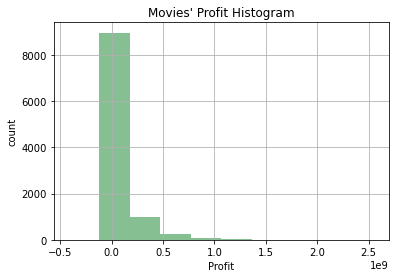

In [123]:
#Draw histogram for Profit
runtimeHist=df_v1.Profit.plot(title='Movies\' Profit Histogram',grid=True,color='#86bf91', kind="hist");
runtimeHist.set_xlabel("Profit");
runtimeHist.set_ylabel("count");

### I found that profit appear skewed to the right

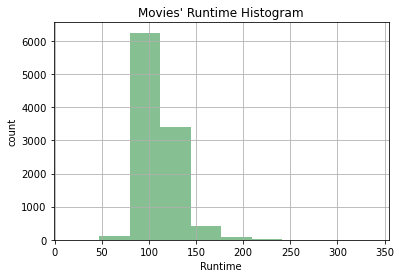

In [124]:
#Draw histogram for runtime
runtimeHist=df_v1.runtime.plot(title='Movies\' Runtime Histogram',grid=True,color='#86bf91', kind="hist");
runtimeHist.set_xlabel("Runtime");
runtimeHist.set_ylabel("count");

### Also, Movies\' Runtime appear skewed to the right

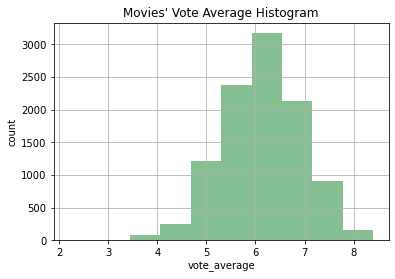

In [125]:
#Draw histogram for runtime
VoteAverageHist=df_v1.vote_average.plot(title='Movies\' Vote Average Histogram',grid=True,color='#86bf91', kind="hist");
VoteAverageHist.set_xlabel("vote_average");
VoteAverageHist.set_ylabel("count");

### here, Movies\' Runtime Vote Average skewed to the left

# Q1. Which movie\'s genres have more votes?          
### To answer this question, we have to create a bar plot chart that elaborates the Average votes for each genre

In [126]:
# using groupby to get Vote of each genres
genresVote =df_v1.groupby('genres').vote_average.mean().reset_index(name='vote_average')
genresVote

,genres,vote_average
0,Action,6.037
1,Adventure,6.124
2,Animation,6.381
3,Comedy,6.026
4,Crime,6.301
5,Documentary,6.660
6,Drama,6.397
7,Family,6.127
8,Fantasy,6.063
9,Foreign,6.123


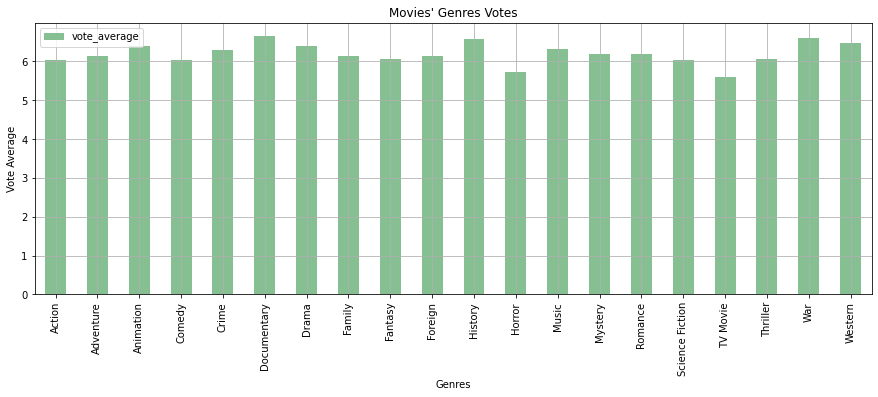

In [127]:
# plot bar chart
genresVotePlt=genresVote.plot(kind='bar',title='Movies\' Genres Votes', x='genres', y='vote_average', grid=True,color='#86bf91',figsize=(15, 5));
genresVotePlt.set_xlabel("Genres");
genresVotePlt.set_ylabel("Vote Average");

### notice that vote results of genres are similar, documentory, war, history, western have more votes

## Q2. Which movie's genres have more Profitability? 
### here, we have to create a bar plot that elaborates the Average profit for each genre

In [128]:
# using groupby to get Profit of each genres
genresProfit = df_v1.groupby('genres').Profit.mean().reset_index(name='Profit_average')
genresProfit

,genres,Profit_average
0,Action,100136713.967
1,Adventure,148352937.636
2,Animation,180185027.517
3,Comedy,64227508.638
4,Crime,51107351.304
5,Documentary,17671424.343
6,Drama,46274882.844
7,Family,140674391.132
8,Fantasy,147516732.780
9,Foreign,1685289.000


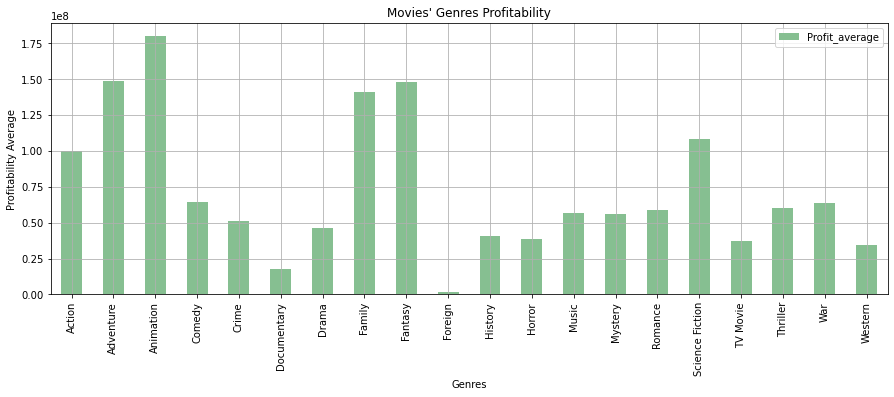

In [129]:
# plot bar chart
genresProfitPlt = genresProfit.plot(kind='bar',title='Movies\' Genres Profitability', x='genres', y='Profit_average',grid=True,color='#86bf91',figsize=(15, 5));
genresProfitPlt.set_xlabel("Genres");
genresProfitPlt.set_ylabel("Profitability Average");

### we can see that Animation, Adventure, Fantasy have most profit , while Foreign, Documentry, Western have less profit

## Q3. Which movie\'s runtime have more votes?          
### First of all, we have to categorize runtime minutes into ranges by hours for example (0-60,60-120,..) to be enabled to calculate average of eache range of runtime

In [130]:
#create runtime ranges to find count of eache range
Ranges = np.array([0,60,120,180,240,300,360])
runtimeRanges = pd.cut(df_v1['runtime'], bins=Ranges, include_lowest=False)

# using groupby to get Vote of each runtime rang
runtimeVote = df_v1.groupby(runtimeRanges).vote_average.mean().reset_index(name='vote_average')
runtimeVote

,runtime,vote_average
0,"(0, 60]",7.433
1,"(60, 120]",6.026
2,"(120, 180]",6.567
3,"(180, 240]",7.004
4,"(240, 300]",6.300
5,"(300, 360]",6.200


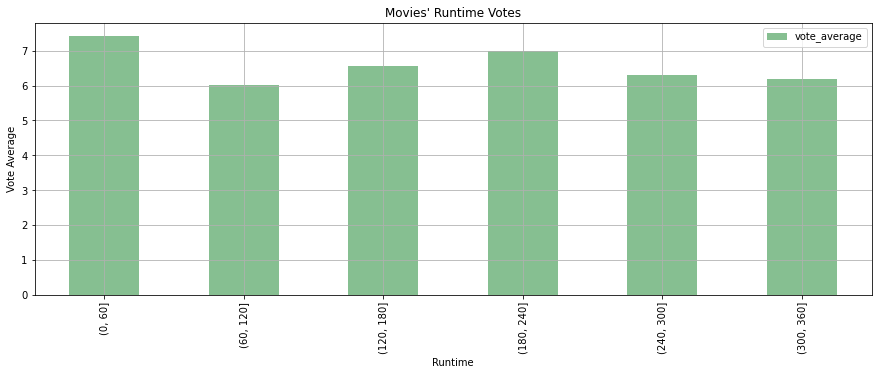

In [131]:
# plot bar chart
runtimeVotePlt = runtimeVote.plot(kind='bar',title='Movies\' Runtime Votes', x='runtime', y='vote_average', grid=True,color='#86bf91',figsize=(15, 5));
runtimeVotePlt.set_xlabel("Runtime");
runtimeVotePlt.set_ylabel("Vote Average");

### 0-60, 180- 240 minutes runtime movies have the most votes

## Q4. Which movie's runtime have more Profitability? 
### here, we have to create a bar plot that elaborates the Average profit for each runtime range

In [132]:
# using groupby to get Profit of each runtime rang
runtimeProfit = df_v1.groupby(runtimeRanges).Profit.mean().reset_index(name='Profit_average')
runtimeProfit

,runtime,Profit_average
0,"(0, 60]",3888889.444
1,"(60, 120]",57680509.253
2,"(120, 180]",145477522.098
3,"(180, 240]",157678293.798
4,"(240, 300]",26635000.000
5,"(300, 360]",-17128721.000


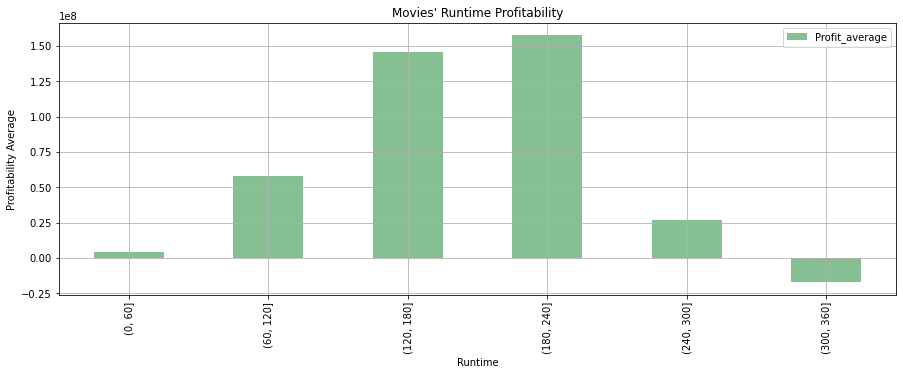

In [133]:
# plot bar chart
runtimeProfitPlt = runtimeProfit.plot(kind='bar',title='Movies\' Runtime Profitability',x='runtime', y='Profit_average',
                   grid=True,color='#86bf91',figsize=(15, 5));
runtimeProfitPlt.set_xlabel("Runtime");
runtimeProfitPlt.set_ylabel("Profitability Average");

###  180- 240, 120-180 runtime ranges are profit more than others

## Q5.How does the movie runtime changed over the years (is movies time become less than past..)?
### here, we have to create a bar plot that elaborates the Average profit for each runtime range

In [134]:
# using groupby to get Vote Average of each year, runtime 
yearlyruntimeCount = df_v1.groupby(['release_year', runtimeRanges]).id.count().reset_index(name='count')
yearlyruntimeCount

,release_year,runtime,count
0,1960,"(0, 60]",0
1,1960,"(60, 120]",5
2,1960,"(120, 180]",6
3,1960,"(180, 240]",3
4,1960,"(240, 300]",0
...,...,...,...
331,2015,"(60, 120]",285
332,2015,"(120, 180]",116
333,2015,"(180, 240]",0
334,2015,"(240, 300]",0


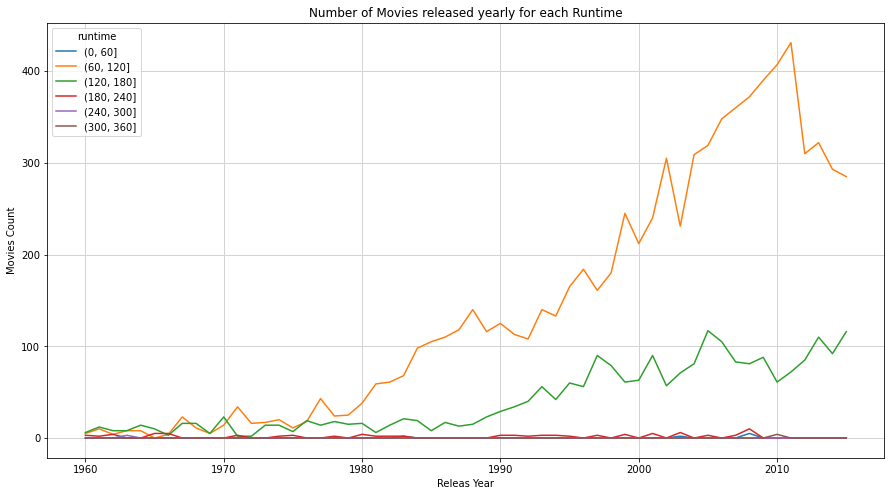

In [135]:
#plot multiple lines
plt.figure(figsize=(15,8))
ax=sns.lineplot(data=yearlyruntimeCount, x='release_year', y='count', hue='runtime')
ax.grid(b=True, which='major', color='#d3d3d3', linewidth=1.0)
ax.grid(b=True, which='minor', color='#d3d3d3', linewidth=0.5)
# plot data
plt.title("Number of Movies released yearly for each Runtime")
plt.xlabel("Releas Year")
plt.ylabel("Movies Count")
plt.show()


### we can note that all runtime ranges on the past released similary until 80's you can see that only movies with runtime between 60-120,120-180 relaesd more than other signeficantly 

<a id='conclusions'></a>
## Conclusions

> ### Finaly, I found that the runtime and geners are effect on profit of movies, when analysing geners and it's impact on profit; i notice that movies with highest geners are Animation, Adventure, Fantasy while most voted movies\' geners are documentory, war, history, western which is not similar to profit but the reason perhaps due to the vote resultsfor all geners are similer and on the range 5.5 to 6.7.
> ### Also, movies with runtime on range 180-240 profit more than other and alose ahve most votes, over the years production > companies focusing on releasing movies within 60 minuts to 120 minuts more than others
> ### One of the limitations that i faced is there ar many recordes with zero budget or revenue values that i have to remove it whech is reduce dataframe size

In [136]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_TMDb_movie_Dataset.ipynb'])

4294967295